# Eigenfaces

The dataset consists of images of 38 people. For each person, there are 9 poses and 64 lighting conditions, for a total of 21888 images. Each image is 192 pixels tall and 168 pixels wide; when flattened, it is a vector with 32,256 elements.

In [1]:
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

Download data file if it is not present.

In [2]:
if os.path.isfile('../DATA/allFaces.mat') == False:
    !mkdir -p ../DATA
    !wget -P ../DATA -c https://bitbucket.org/cpraveen/nla/downloads/allFaces.mat

Load the images

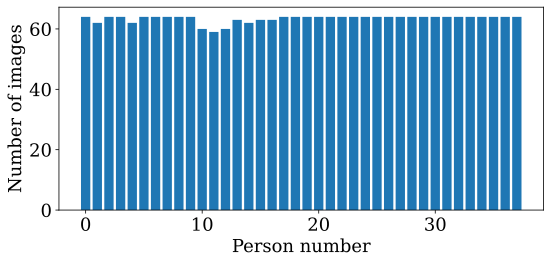

In [3]:
mat_contents = scipy.io.loadmat('../DATA/allFaces.mat')
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

plt.figure(figsize=(8,4))
plt.bar(np.arange(len(nfaces)),nfaces)
plt.xlabel('Person number')
plt.ylabel('Number of images')
plt.show()

 and plot the first 36 of them.

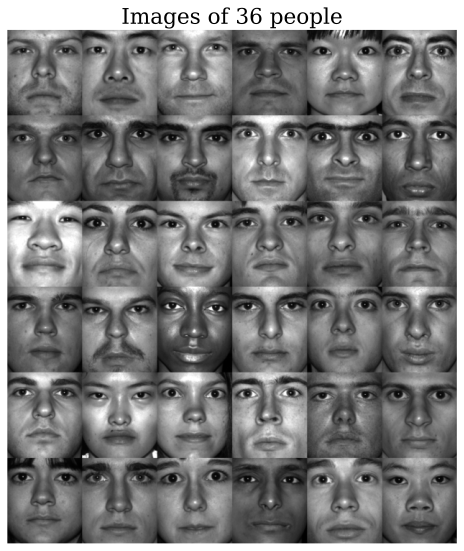

In [4]:
allPersons = np.zeros((n*6,m*6))
count = 0

for j in range(6):
    for k in range(6):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(faces[:,np.sum(nfaces[:count])],(m,n)).T
        count += 1
        
img = plt.imshow(allPersons)
img.set_cmap('gray')
plt.axis('off')
plt.title('Images of 36 people')
plt.show()

Let us use the first 36 people as the data. We compute the average image and subtract it from all images. The images are then stacked as columns of a matrix $X$ of size $32256 \times 2282$.

In [5]:
# We use the first 36 people for training data
trainingFaces = faces[:,:np.sum(nfaces[:36])]
avgFace = np.mean(trainingFaces,axis=1) # size n*m by 1

# Compute eigenfaces on mean-subtracted training data
X = trainingFaces - np.tile(avgFace,(trainingFaces.shape[1],1)).T
print('Size of X = ', X.shape)
U, S, VT = np.linalg.svd(X,full_matrices=0)

Size of X =  (32256, 2282)


Plot the average face and first few eigenfaces.

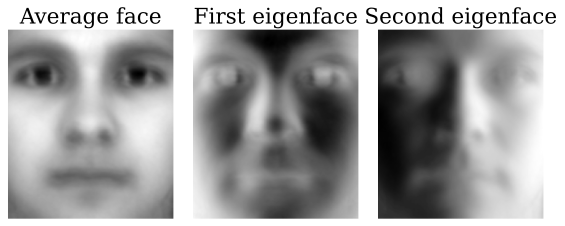

In [6]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(131)
img_avg = ax1.imshow(np.reshape(avgFace,(m,n)).T)
img_avg.set_cmap('gray')
plt.title('Average face')
plt.axis('off')

ax2 = fig1.add_subplot(132)
img_u1 = ax2.imshow(np.reshape(U[:,0],(m,n)).T)
img_u1.set_cmap('gray')
plt.title('First eigenface')
plt.axis('off')

ax3 = fig1.add_subplot(133)
img_u2 = ax3.imshow(np.reshape(U[:,1],(m,n)).T)
img_u2.set_cmap('gray')
plt.title('Second eigenface')
plt.axis('off')

plt.show()

The singular values decrease very rapidly.

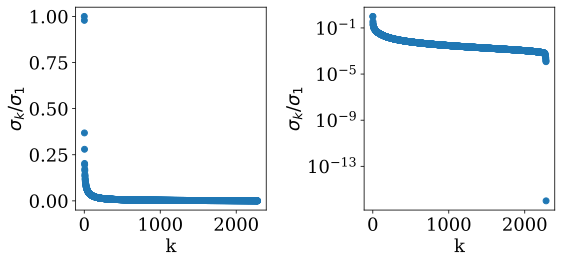

In [7]:
# Plot singular values: linear scale
fig2 = plt.figure(figsize=(8,4))
ax = fig2.add_subplot(121)
ax.plot(S/S[0],'o')
ax.set_xlabel('k')
ax.set_ylabel('$\\sigma_k / \\sigma_1$')

# Plot singular values: log scale
ax = fig2.add_subplot(122)
ax.semilogy(S/S[0],'o')
ax.set_xlabel('k')
ax.set_ylabel('$\\sigma_k / \\sigma_1$')

plt.show()

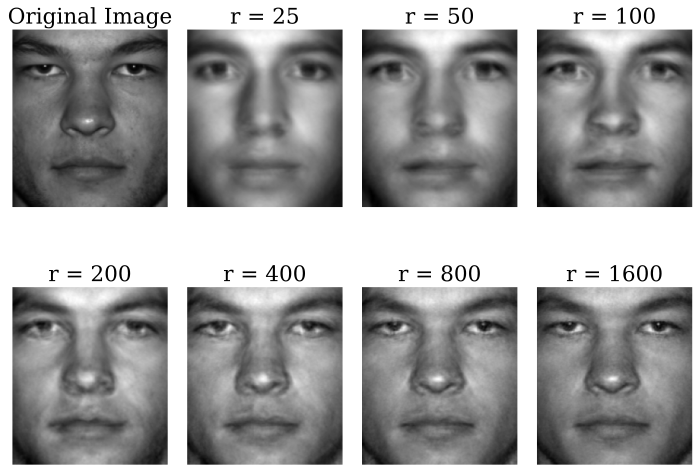

In [8]:
## Now show eigenface reconstruction of image that was omitted from test set
fig = plt.figure(figsize=(10,8))

c = 1; ax = fig.add_subplot(2,4,c)
testFace = faces[:,np.sum(nfaces[:36])] # First face of person 37
img = ax.imshow(np.reshape(testFace,(m,n)).T)
img.set_cmap('gray')
plt.title('Original Image')
plt.axis('off')

testFaceMS = testFace - avgFace
r_list = [25, 50, 100, 200, 400, 800, 1600]

for r in r_list:
    c = c + 1; ax = fig.add_subplot(2,4,c)
    reconFace = avgFace + U[:,:r]  @ (U[:,:r].T @ testFaceMS)
    img = ax.imshow(np.reshape(reconFace,(m,n)).T)
    img.set_cmap('gray')
    plt.title('r = ' + str(r))
    plt.axis('off')

plt.show()

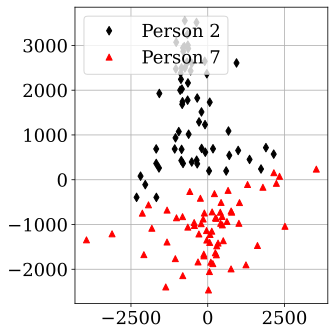

In [9]:
## Project person 2 and 7 onto PC5 and PC6

P1num = 2 # Person number 2
P2num = 7 # Person number 7

P1 = faces[:,np.sum(nfaces[:(P1num-1)]):np.sum(nfaces[:P1num])]
P2 = faces[:,np.sum(nfaces[:(P2num-1)]):np.sum(nfaces[:P2num])]

P1 = P1 - np.tile(avgFace,(P1.shape[1],1)).T
P2 = P2 - np.tile(avgFace,(P2.shape[1],1)).T

PCAmodes = [5, 6] # Project onto PCA modes 5 and 6
PCACoordsP1 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P1
PCACoordsP2 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P2

plt.figure(figsize=(5,5))
plt.plot(PCACoordsP1[0,:],PCACoordsP1[1,:],'d',color='k',label='Person 2')
plt.plot(PCACoordsP2[0,:],PCACoordsP2[1,:],'^',color='r',label='Person 7')
plt.grid(True)
plt.legend()
plt.show()